In [1]:
import numpy as np
import matplotlib.pyplot as plt  
from IPython.display import display

In [2]:
run -i '/gamma_home/ozamiel/athena2/vis/python/athena_read.py'

In [6]:
frame=2430
dir='output_files_pr_cor_n/refined_3'
#xf,yf,zf,A=vtk('/Users/Omer/Documents/Academic_Projects/ATHENA_code/athane++_pub_new/athena/runs/kink.block0.out2.00000.vtk')
#xf,yf,zf,A=vtk('/Users/Omer/Documents/Academic_Projects/ATHENA_code/athane++_pub_new/athena/runs1/kink.block0.out2.%1.5d.vtk'%frame)
#A=athdf('/gamma_home/omerbr/ATHENA/athena_oz/runs/test_BC/jet.out2.%1.5d.athdf'%frame)
A=athdf('/gamma_home/ozamiel/athena2/runs_magfld/B_method/'+dir+'/jet.out2.%1.5d.athdf'%frame,return_levels = 1)
print(A.keys())

#xc=(A['x1f'][1:]+A['x1f'][:-1])/2;
#yc=(A['x2f'][1:]+A['x2f'][:-1])/2;
#zc=(A['x3f'][1:]+A['x3f'][:-1])/2;
gam_add=4./3
rc=A['x1v']
thc=A['x2v']
zc=A['x3v']

rr, tt = np.meshgrid(rc,thc)
xx=rr*np.cos(tt)
yy=rr*np.sin(tt)

#phi=np.arctan2(yy,xx)
#Bphi=-A["Bcc1"]*np.sin(phi)+A["Bcc2"]*np.cos(phi)
Br=A["Bcc1"]
Bphi=A["Bcc2"]
Bz=A["Bcc3"]
p=A["press"]
rho=A["rho"]
ur=A["vel1"]
uphi=A["vel2"]
uz=A["vel3"]
usq=A["vel1"]**2+A["vel2"]**2+A["vel3"]**2
vabs=np.sqrt(usq/(usq+1))
gamsq=np.sqrt(usq+1)
udotB=A["vel1"]*A["Bcc1"]+A["vel2"]*A["Bcc2"]+A["vel3"]*A["Bcc3"]
Bsq=A["Bcc1"]**2+A["Bcc2"]**2+A["Bcc3"]**2
bsq=1./gamsq*(udotB**2+Bsq)  #proper frame B
bsq[np.where(bsq==0)]=1e-15
w=rho+gam_add/(gam_add-1)*p
atwd = (usq+1)*(rho+gam_add*p)
h = 1+(gam_add/(gam_add-1))*(p/rho)
sig = bsq/rho
levels=A['Levels']


# grid sizes and cell shape
Nx,Ny,Nz=np.shape(A["rho"])
dr=A['x1f'][1:]-A['x1f'][:-1]
dth=A['x2f'][1:]-A['x2f'][:-1]
dz=A['x3f'][1:]-A['x3f'][:-1]
display("Time:%1.1f"%(A['Time']))
display("Box size: (r_min,r_max,z_min,z_max) = %1.1f,%1.1f,%1.1f,%1.1f"%(A['x1f'][0],A['x1f'][-1],A['x3f'][0],A['x3f'][-1]))
display("(Nx,Ny,Nz) = %d,%d,%d"%(Nx,Ny,Nz))
display("(dr[0],r[0]*dth,dz) = %f,%f,%f"%(dr[0],rc[0]*dth[0],dz[0]))
display("(dz/dr[0],dz/r[0]dth,dr[0]/r[0]dth) = %f,%f,%f"%(dz[0]/dr[0],dz[0]/(rc[0]*dth[0]),dr[0]/(rc[0]*dth[0])))
#display(dr/dz[0])
#display(dr/(rc*dth[0]))
#display(rc*dth[0]/dz)

z=114
grad_r = (rho[z,0,1:len(rc)]-rho[z,0,0:len(rc)-1])#/(rc[1:len(rc)]-rc[0:len(rc)-1])
grad_phi = (rho[z,1:len(thc),0]-rho[z,0:len(thc)-1,0])
grad_z = (rho[1:len(zc),0,50]-rho[0:len(zc)-1,0,50])
#print(grad)
#print(np.where(grad == np.max(grad))[0])
#Rj = rc[np.where(grad == np.max(grad))[0]+1]
#print("Rj:",Rj)
#print((A["Bcc2"])[0,0,:][32],rc[32])
#print(np.shape(A['Bcc2']))
#plt.plot(rc,(np.log10(A["rho"]))[0,0,:])
#plt.plot(rc[1:len(rc)],grad_r)
#plt.xlim(1.5,8)
#plt.xlabel("$r$")
#plt.ylabel("$B$")
#plt.title("$B_\\varphi$ at z=0")
#print(rho[76,0,:])
#plt.savefig("./output/Bphi_z0_cor")
#print(rc)
print(np.shape(p))
#plt.plot((rc[1:]-rc[:-1])/rc[1:])

figsize=(18,18)
#parList = ("rho", "p", "vabs", "Bphi", "Bz","Br")
#parList = ("Bz", "Bz", "vabs", "Bphi", "Bz")
parList = ("np.log10(rho)[0,0,:]","np.log10(p)[0,0,:]","(vabs*gamsq)[0,0,:]","Br[0,0,:]","Bphi[0,0,:]","Bz[0,0,:]","ur[0,0,:]","uphi[0,0,:]","sig[0,0,:]") 
titleList=("$log(\\rho)$","$log(p)$","|$\\gamma\\beta$|","$B_r$","$B_\\varphi$","$B_z$","$u_r$","$u_\\varphi$","$\\sigma$")
Np=len(parList)
fig, axs = plt.subplots(3, int(Np/3), figsize=figsize)
for i in range(0,Np,1):
    #fig.subplots_adjust(hspace=4.0, wspace=1.0)
    #plt.subplot(len(parList), 3, 1+i)
    par=eval(parList[i])
    row=i//(int(Np/3))
    col=np.mod(i,int(Np/3))
    im1=axs[row,col].plot(rc,par)
    #if(par.max()>par.min()):
        #im1=axs[row,col].contourf(xx,yy,par,levels=np.linspace(par.min(),par.max(),100),cmap="jet");
    #else:
        #im1=axs[row,col].contourf(xx,yy,par,cmap="jet");
    #plt.colorbar(im1, ax=axs[row,col])
    #plt.title('Pluto: '+titleList[i])
    axs[row,col].set_title(titleList[i]+',z=%1.2f'%(zc[0])+' t=%d [a/c]'%(frame))
    axs[row,col].set_xlabel('$r$')
    axs[row,col].axis(xmin=1.5,xmax=8)
    
        
    
plt.draw()
#plt.savefig('./output/values')
#plt.show()

dict_keys(['Coordinates', 'DatasetNames', 'MaxLevel', 'MeshBlockSize', 'NumCycles', 'NumMeshBlocks', 'NumVariables', 'RootGridSize', 'RootGridX1', 'RootGridX2', 'RootGridX3', 'Time', 'VariableNames', 'x1f', 'x1v', 'x2f', 'x2v', 'x3f', 'x3v', 'rho', 'press', 'vel1', 'vel2', 'vel3', 'Bcc1', 'Bcc2', 'Bcc3', 'Levels'])


KeyboardInterrupt: 

'sigma_M max:'

4791.8610433946105

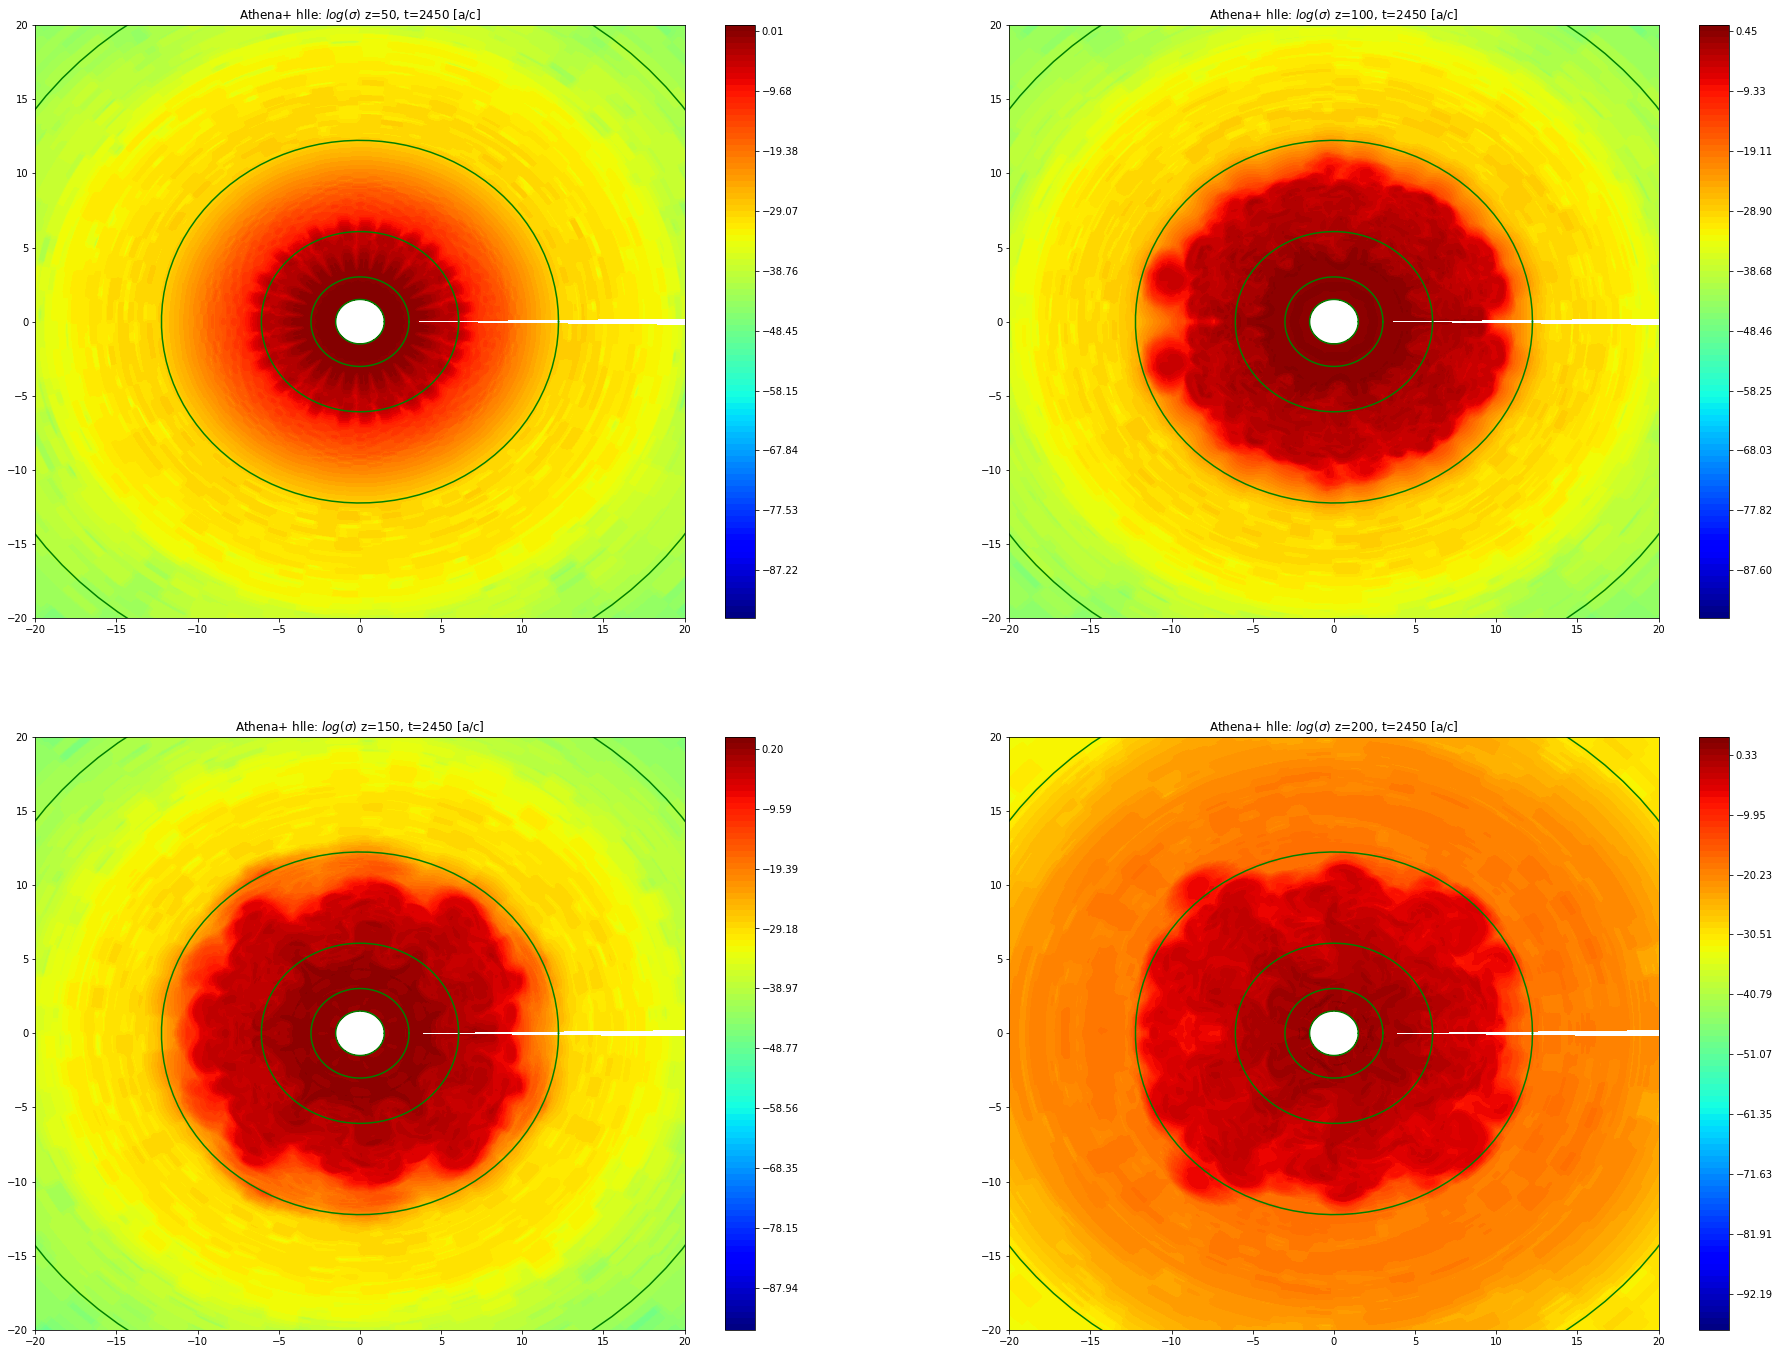

In [7]:
#Runs figures that change with time

#figsize=(18,24)
#figsize=(6,24)

#dir='output_files_pr_cor_k'
#A_stb=athdf('/gamma_home/ozamiel/athena/runs_srjet/runs_magfld/B_method/'+dir+'/jet.out2.%1.5d.athdf'%1500)
#rho_stb=A_stb["rho"]
def Rj(z):
    grad = (rho[z,0,1:len(rc)]-rho[z,0,0:len(rc)-1])/(rc[1:len(rc)]-rc[0:len(rc)-1])
    Rj = rc[np.where(grad == np.max(grad))[0]+1]
    return Rj

def z_cl(z):
    if z >= zc[-1]:
        return len(zc)-1
    return int(len(zc)*z/zc[-1])

#frame=195
for frame in range(2450,2451):
    dir='output_files_pr_cor_n/refined_3'
    #xf,yf,zf,A=vtk('/Users/Omer/Documents/Academic_Projects/ATHENA_code/athane++_pub_new/athena/runs/kink.block0.out2.00000.vtk')
    #xf,yf,zf,A=vtk('/Users/Omer/Documents/Academic_Projects/ATHENA_code/athane++_pub_new/athena/runs1/kink.block0.out2.%1.5d.vtk'%frame)
    #A=athdf('/gamma_home/omerbr/ATHENA/athena_oz/runs/test_BC/jet.out2.%1.5d.athdf'%frame)
    A=athdf('/gamma_home/ozamiel/athena2/runs_magfld/B_method/'+dir+'/jet.out2.%1.5d.athdf'%frame,return_levels = 1)
    #print(A.keys())

    #xc=(A['x1f'][1:]+A['x1f'][:-1])/2;
    #yc=(A['x2f'][1:]+A['x2f'][:-1])/2;
    #zc=(A['x3f'][1:]+A['x3f'][:-1])/2;
    gam_add=4./3
    rc=A['x1v']
    thc=A['x2v']
    zc=A['x3v']

    rr, tt = np.meshgrid(rc,thc)
    xx=rr*np.cos(tt)
    yy=rr*np.sin(tt)
    
          
    #phi=np.arctan2(yy,xx)
    #Bphi=-A["Bcc1"]*np.sin(phi)+A["Bcc2"]*np.cos(phi)
    Br=A["Bcc1"]
    Bphi=A["Bcc2"]
    Bz=A["Bcc3"]
    p=A["press"]
    rho=A["rho"]
    ur=A["vel1"]
    uphi=A["vel2"]    
    uz=A["vel3"]
    usq=A["vel1"]**2+A["vel2"]**2+A["vel3"]**2
    vabs=np.sqrt(usq/(usq+1))
    gamsq=np.sqrt(usq+1)
    udotB=A["vel1"]*A["Bcc1"]+A["vel2"]*A["Bcc2"]+A["vel3"]*A["Bcc3"]
    Bsq=A["Bcc1"]**2+A["Bcc2"]**2+A["Bcc3"]**2
    bsq=1./gamsq*(udotB**2+Bsq)  #proper frame B
    bsq[np.where(bsq==0)]=1e-15
    w=rho+gam_add/(gam_add-1)*p
    sigma = bsq/rho
    display("sigma_M max:", np.max(bsq/rho))
    levels = A["Levels"]
    #print("rr:",np.shape(rr),"\ntt:",np.shape(tt),"\nxx:",np.shape(xx),"\nBz:",np.shape(Bz))

    #figsize=(18,24)
    rr1, zz1 = np.meshgrid(rc,zc)
    mesh = np.array([0,32,64,96,128,160,192])
    blocks = 1.5*1.0221**(mesh)
    
    figsize=(32,24)
    #real_z = zc*
    #parList = ("np.log10(rho)", "np.log10(p)", "vabs", "Bphi", "Bz","Br")
    #parList = ("logrho","logp","vabs", "Bphi", "Bz","Br")
    
    #parList = ("Bphi[38,:,:]*rr","Bphi[76,:,:]*rr","Bphi[114,:,:]*rr","Bphi[152,:,:]*rr","Bz[38,:,:]*rr*rr", "Bz[76,:,:]*rr*rr","Bz[114,:,:]*rr*rr","Bz[152,:,:]*rr*rr") 
    #titleList=("$B_\\varphi*r$ z=20","$B_\\varphi*r$ z=40","$B_\\varphi*r$ z=60","$B_\\varphi*r$ z=80","$B_z*(r)^2$ z=20","$B_z*(r)^2$ z=40","$B_z*(r)^2$ z=60","$B_z*(r)^2$ z=80")
    
    #parList = ("(np.log10(rho))[96,:,:]","(np.log10(rho))[192,:,:]","(np.log10(rho))[288,:,:]","(np.log10(rho))[383,:,:]")#,"Bz[38,:,:]*rr*rr", "Bz[76,:,:]*rr*rr","Bz[114,:,:]*rr*rr","Bz[152,:,:]*rr*rr") 
    #titleList=("$log(\\rho)$ z=50","$log(\\rho)$ z=100","$log(\\rho)$ z=150","$log(\\rho)$ z=200")#,"$B_z*(r)^2$ z=20","$B_z*(r)^2$ z=40","$B_z*(r)^2$ z=60","$B_z*(r)^2$ z=80")
    
    parList = ("(np.log10(sigma))[z_cl(50),:,:]","(np.log10(sigma))[z_cl(100),:,:]","(np.log10(sigma))[z_cl(150),:,:]","(np.log10(sigma))[z_cl(200),:,:]")
    titleList=("$log(\\sigma)$ z=50","$log(\\sigma)$ z=100","$log(\\sigma)$ z=150","$log(\\sigma)$ z=200")
    
    #parList = ("(np.log10(rho))[z_cl(50),:,:]","(np.log10(rho))[z_cl(100),:,:]","(np.log10(rho))[z_cl(150),:,:]","(np.log10(rho))[z_cl(200),:,:]")
    #titleList=("$log(\\rho)$ z=50","$log(\\rho)$ z=100","$log(\\rho)$ z=150","$log(\\rho)$ z=200")
    
    #parList = ("levels[z_cl(50),:,:]","levels[z_cl(100),:,:]","levels[z_cl(150),:,:]","levels[z_cl(200),:,:]")
    
    #parList = ("levels[38,:,:]","levels[76,:,:]","levels[114,:,:]","levels[380,:,:]")#,"Bz[38,:,:]*rr*rr", "Bz[76,:,:]*rr*rr","Bz[114,:,:]*rr*rr","Bz[152,:,:]*rr*rr") 
    #titleList=("$B_\\varphi*r$ z=10","$B_\\varphi*r$ z=20","$B_\\varphi*r$ z=30","$B_\\varphi*r$ z=100")#,"$B_z*(r)^2$ z=20","$B_z*(r)^2$ z=40","$B_z*(r)^2$ z=60","$B_z*(r)^2$ z=80")
    Np=len(parList)
    #fig, axs = plt.subplots(Np, 3, figsize=figsize)
    #fig, axs = plt.subplots(Np, 1, figsize=figsize)
    #fig, axs = plt.subplots(2, 1, figsize=figsize)
    fig, axs = plt.subplots(2, int(Np/2), figsize=figsize)
    #fig = plt.figure(figsize=figsize)
    for i in range(0,Np,1):
        #fig.subplots_adjust(hspace=4.0, wspace=1.0)
        #plt.subplot(len(parList), 3, 1+i)
        par=eval(parList[i])
        row=i//(int(Np/2))
        col=np.mod(i,int(Np/2))
        if(par.max()>par.min()):
            im1=axs[row,col].contourf(xx,yy,par,levels=np.linspace(par.min(),par.max(),100),cmap="jet");
        else:
            im1=axs[row,col].contourf(xx,yy,par,cmap="jet");
        for blc in blocks:
            axs[row,col].plot(blc*np.cos(np.linspace(0, 2*np.pi, 100)), blc*np.sin(np.linspace(0, 2*np.pi, 100)), color='g', linestyle='-')
        plt.colorbar(im1, ax=axs[row,col])
        #plt.title('Pluto: '+titleList[i])
        axs[row,col].set_title('Athena+ hlle: '+titleList[i]+', t=%d [a/c]'%(frame))
        axs[row,col].axis(xmin=-20,xmax=20,ymin=-20,ymax=20)
    
        
    
    plt.draw()
    plt.savefig('./output/combined_cyl/%1.5d_sigm'%frame)
    #plt.show()

In [3]:
#frame=195
for frame in range(2446,2447):
    dir='output_files_pr_cor_o/refined_3'
    #xf,yf,zf,A=vtk('/Users/Omer/Documents/Academic_Projects/ATHENA_code/athane++_pub_new/athena/runs/kink.block0.out2.00000.vtk')
    #xf,yf,zf,A=vtk('/Users/Omer/Documents/Academic_Projects/ATHENA_code/athane++_pub_new/athena/runs1/kink.block0.out2.%1.5d.vtk'%frame)
    #A=athdf('/gamma_home/omerbr/ATHENA/athena_oz/runs/test_BC/jet.out2.%1.5d.athdf'%frame)
    A=athdf('/gamma_home/ozamiel/athena2/runs_magfld/B_method/'+dir+'/jet.out2.%1.5d.athdf'%frame,x1_max = 15)
    #print(A.keys())

    #xc=(A['x1f'][1:]+A['x1f'][:-1])/2;
    #yc=(A['x2f'][1:]+A['x2f'][:-1])/2;
    #zc=(A['x3f'][1:]+A['x3f'][:-1])/2;
    gam_add=4./3
    rc=A['x1v']
    thc=A['x2v']
    zc=A['x3v']

    rr, tt = np.meshgrid(rc,thc)
    xx=rr*np.cos(tt)
    yy=rr*np.sin(tt)

    #phi=np.arctan2(yy,xx)
    #Bphi=-A["Bcc1"]*np.sin(phi)+A["Bcc2"]*np.cos(phi)
    Br=A["Bcc1"]
    Bphi=A["Bcc2"]
    Bz=A["Bcc3"]
    p=A["press"]
    rho=A["rho"]
    ur=A["vel1"]
    uphi=A["vel2"]
    uz=A["vel3"]
    usq=A["vel1"]**2+A["vel2"]**2+A["vel3"]**2
    vabs=np.sqrt(usq/(usq+1))
    gamsq=np.sqrt(usq+1)
    udotB=A["vel1"]*A["Bcc1"]+A["vel2"]*A["Bcc2"]+A["vel3"]*A["Bcc3"]
    Bsq=A["Bcc1"]**2+A["Bcc2"]**2+A["Bcc3"]**2
    bsq=1./gamsq*(udotB**2+Bsq)  #proper frame B
    bsq[np.where(bsq==0)]=1e-15
    w=rho+gam_add/(gam_add-1)*p
    Nx,Ny,Nz=np.shape(A["rho"])
    sigma = bsq/rho
    #atwd=(usq+1)*w
    display("sigma_M max:", np.max(bsq/rho))

    #figsize=(18,24)
    rr1, zz1 = np.meshgrid(rc,zc)
    figsize=(24,12)
    #parList ("np.log10(rho)", "p", "np.sqrt(usq)", "bsq", "bsq/rho", "bsq/w")
    parList = ("np.log10(rho)", "np.log10(p)", "np.sqrt(usq)", "np.log10(bsq)", "np.log10(bsq/rho)", "np.log10(bsq/w)")
    #parList = ("Bz", "Bz", "vabs", "Bphi", "Bz")
    #parList = ("np.log10(atwd)")
    titleList=("log[$\\rho$]", "log[$p$]", "|$\\gamma\\beta$|", "log[$b^2$]", "log[$\sigma_M$]", "log[$\sigma_R$]")
    #titleList=("log[$atwd$]")
    Np=len(parList)
    #fig, axs = plt.subplots(Np, 3, figsize=figsize)
    fig, axs = plt.subplots(2, int(Np/2), figsize=figsize)
    #fig = plt.figure(figsize=figsize)
    for i in range(0,Np,1):
        par1=eval(parList[i])[:,0,:]
        par2=eval(parList[i])[:,int(Ny/2),:]
        parMin=np.min([par1.min(),par2.min()])
        parMax=np.max([par1.max(),par2.max()])
        row=i//int(Np/2)
        col=np.mod(i,int(Np/2))
        if (i>2):
            parMin=parMax-5
        if [row,col] == [0,2]: parMin = 1.5 ; parMax = 6
        if [row,col] == [1,1]: parMin = -1 ; parMax = 1
        if [row,col] == [1,2]: parMin = -2 ; parMax = -0.5
        levelsP=np.linspace(parMin,parMax,100)

        if(par1.max()>par1.min()):
            im1=axs[row,col].contourf(rr1,zz1,par1,levels=levelsP,cmap="jet",extend='both');
        else:
            im1=axs[row,col].contourf(rr1,zz1,par1,cmap="jet",extend='both');
        
        if(par2.max()>par2.min()):
            im2=axs[row,col].contourf(-rr1,zz1,par2,levels=levelsP,cmap="jet",extend='both');
        else:
            im2=axs[row,col].contourf(-rr1,zz1,par2,cmap="jet",extend='both');
        plt.colorbar(im1, ax=axs[row,col])
        #axs[row,col].axis(xmin=-15,xmax=15)
        axs[row,col].set_title(titleList[i]+', t=%d [a/c]'%(frame))
        
    
    plt.draw()
    #plt.savefig('./output/combined/%1.5d'%frame)
    plt.show()

KeyboardInterrupt: 

#### r = 3.0568802629538214
print(0.4*(2.5/r)*np.tanh((5-r)/0.5))

In [ ]:
#Runs figures that change with z (slice that goes up through the jet)

#figsize=(18,24)
#figsize=(6,24)

#dir='output_files_pr_cor_k'
#A_stb=athdf('/gamma_home/ozamiel/athena/runs_srjet/runs_magfld/B_method/'+dir+'/jet.out2.%1.5d.athdf'%1500)
#rho_stb=A_stb["rho"]
def Rj(z):
    grad = (rho[z,0,1:len(rc)]-rho[z,0,0:len(rc)-1])/(rc[1:len(rc)]-rc[0:len(rc)-1])
    Rj = rc[np.where(grad == np.max(grad))[0]+1]
    return Rj

def z_cl(z):
    if z >= zc[-1]:
        return len(zc)-1
    return int(len(zc)*z/zc[-1])

frame=2450
dir='output_files_pr_cor_n/refined_3'
#xf,yf,zf,A=vtk('/Users/Omer/Documents/Academic_Projects/ATHENA_code/athane++_pub_new/athena/runs/kink.block0.out2.00000.vtk')
#xf,yf,zf,A=vtk('/Users/Omer/Documents/Academic_Projects/ATHENA_code/athane++_pub_new/athena/runs1/kink.block0.out2.%1.5d.vtk'%frame)
#A=athdf('/gamma_home/omerbr/ATHENA/athena_oz/runs/test_BC/jet.out2.%1.5d.athdf'%frame)
A=athdf('/gamma_home/ozamiel/athena2/runs_magfld/B_method/'+dir+'/jet.out2.%1.5d.athdf'%frame,level = 1)#,return_levels = 1)  ##for refinement level 2, levels = 1
print(A.keys())

#xc=(A['x1f'][1:]+A['x1f'][:-1])/2;
#yc=(A['x2f'][1:]+A['x2f'][:-1])/2;
#zc=(A['x3f'][1:]+A['x3f'][:-1])/2;
gam_add=4./3
rc=A['x1v']
thc=A['x2v']
zc=A['x3v']

rr, tt = np.meshgrid(rc,thc)
xx=rr*np.cos(tt)
yy=rr*np.sin(tt)
    
          
#phi=np.arctan2(yy,xx)
#Bphi=-A["Bcc1"]*np.sin(phi)+A["Bcc2"]*np.cos(phi)
Br=A["Bcc1"]
Bphi=A["Bcc2"]
Bz=A["Bcc3"]
p=A["press"]
rho=A["rho"]
ur=A["vel1"]
uphi=A["vel2"]    
uz=A["vel3"]
usq=A["vel1"]**2+A["vel2"]**2+A["vel3"]**2
vabs=np.sqrt(usq/(usq+1))
gamsq=np.sqrt(usq+1)
udotB=A["vel1"]*A["Bcc1"]+A["vel2"]*A["Bcc2"]+A["vel3"]*A["Bcc3"]
Bsq=A["Bcc1"]**2+A["Bcc2"]**2+A["Bcc3"]**2
bsq=1./gamsq*(udotB**2+Bsq)  #proper frame B
bsq[np.where(bsq==0)]=1e-15
w=rho+gam_add/(gam_add-1)*p
display("sigma_M max:", np.max(bsq/rho))
#levels = A["Levels"]
#print("rr:",np.shape(rr),"\ntt:",np.shape(tt),"\nxx:",np.shape(xx),"\nBz:",np.shape(Bz))

#figsize=(18,24)
rr1, zz1 = np.meshgrid(rc,zc)
mesh = np.array([0,32,64,96,128,160,192])
blocks = 1.5*1.0221**(mesh)
figsize=(10,10)
fig = plt.figure(figsize=figsize)
for z in range(10,len(zc),20):
    #real_z = zc*
    #parList = ("np.log10(rho)", "np.log10(p)", "vabs", "Bphi", "Bz","Br")
    #parList = ("logrho","logp","vabs", "Bphi", "Bz","Br")
    
    #parList = ("Bphi[38,:,:]*rr","Bphi[76,:,:]*rr","Bphi[114,:,:]*rr","Bphi[152,:,:]*rr","Bz[38,:,:]*rr*rr", "Bz[76,:,:]*rr*rr","Bz[114,:,:]*rr*rr","Bz[152,:,:]*rr*rr") 
    #titleList=("$B_\\varphi*r$ z=20","$B_\\varphi*r$ z=40","$B_\\varphi*r$ z=60","$B_\\varphi*r$ z=80","$B_z*(r)^2$ z=20","$B_z*(r)^2$ z=40","$B_z*(r)^2$ z=60","$B_z*(r)^2$ z=80")
    
    #parList = ("(np.log10(rho))[96,:,:]","(np.log10(rho))[192,:,:]","(np.log10(rho))[288,:,:]","(np.log10(rho))[383,:,:]")#,"Bz[38,:,:]*rr*rr", "Bz[76,:,:]*rr*rr","Bz[114,:,:]*rr*rr","Bz[152,:,:]*rr*rr") 
    #titleList=("$log(\\rho)$ z=50","$log(\\rho)$ z=100","$log(\\rho)$ z=150","$log(\\rho)$ z=200")#,"$B_z*(r)^2$ z=20","$B_z*(r)^2$ z=40","$B_z*(r)^2$ z=60","$B_z*(r)^2$ z=80")
    
    
    parList = ("(np.log10(rho))[z,:,:]")
    titleList=["$log(\\rho)$ t=%1.4d"%frame]
    
    #parList = ("levels[z_cl(50),:,:]","levels[z_cl(100),:,:]","levels[z_cl(150),:,:]","levels[z_cl(200),:,:]")
    
    #parList = ("levels[38,:,:]","levels[76,:,:]","levels[114,:,:]","levels[380,:,:]")#,"Bz[38,:,:]*rr*rr", "Bz[76,:,:]*rr*rr","Bz[114,:,:]*rr*rr","Bz[152,:,:]*rr*rr") 
    #titleList=("$B_\\varphi*r$ z=10","$B_\\varphi*r$ z=20","$B_\\varphi*r$ z=30","$B_\\varphi*r$ z=100")#,"$B_z*(r)^2$ z=20","$B_z*(r)^2$ z=40","$B_z*(r)^2$ z=60","$B_z*(r)^2$ z=80")
    Np=len(parList)
    #fig, axs = plt.subplots(Np, 3, figsize=figsize)
    #fig, axs = plt.subplots(Np, 1, figsize=figsize)
    #fig, axs = plt.subplots(2, 1, figsize=figsize)
    #fig, axs = plt.subplots(1, 1, figsize=figsize)
    #for i in range(0,Np,1):
        #fig.subplots_adjust(hspace=4.0, wspace=1.0)
        #plt.subplot(len(parList), 3, 1+i)
        #par=eval(parList[i])
        #row=i//(int(Np/2))
        #col=np.mod(i,int(Np/2))
        #if(par.max()>par.min()):
       #     im1=axs[row].contourf(xx,yy,par,levels=np.linspace(par.min(),par.max(),100),cmap="jet");
        #else:
            #im1=axs[row].contourf(xx,yy,par,cmap="jet");
        #for blc in blocks:
            #axs[row,col].plot(blc*np.cos(np.linspace(0, 2*np.pi, 100)), blc*np.sin(np.linspace(0, 2*np.pi, 100)), color='g', linestyle='-')
        #plt.colorbar(im1, ax=axs[row])
        #plt.title('Pluto: '+titleList[i])
        #axs[row].set_title(titleList[i]+', z=%d'%(z*zc[-1]/len(zc)))
        #axs[row].axis(xmin=-20,xmax=20,ymin=-20,ymax=20)
    par = (np.log10(rho))[z,:,:]
    plt.contourf(xx,yy,par,levels=np.linspace(par.min(),par.max(),100),cmap="jet")
    plt.title(titleList[0]+',z=%d'%(z*zc[-1]/len(zc)))
    plt.axis(xmin=-20,xmax=20,ymin=-20,ymax=20)
    plt.draw()
    plt.savefig('./output/combined_cyl/%1.5d_z'%z)
    #plt.show()

/gamma_home/ozamiel/athena2/vis/python/athena_read.py:538: AthenaWarning: Exact restriction being used: performance severely affected; see documentation
  + ' see documentation', AthenaWarning)


dict_keys(['Coordinates', 'DatasetNames', 'MaxLevel', 'MeshBlockSize', 'NumCycles', 'NumMeshBlocks', 'NumVariables', 'RootGridSize', 'RootGridX1', 'RootGridX2', 'RootGridX3', 'Time', 'VariableNames', 'x1f', 'x1v', 'x2f', 'x2v', 'x3f', 'x3v', 'rho', 'press', 'vel1', 'vel2', 'vel3', 'Bcc1', 'Bcc2', 'Bcc3'])


'Time:2450.0'

'Box size: (r_min,r_max,z_min,z_max) = 1.5,10.0,0.0,200.0'

'(Nx,Ny,Nz) = 1536,256,347'

'(dr[0],r[0]*dth,dz) = 0.008242,0.036917,0.130208'

'(dz/dr[0],dz/r[0]dth,dr[0]/r[0]dth) = 15.797458,3.527077,0.223269'

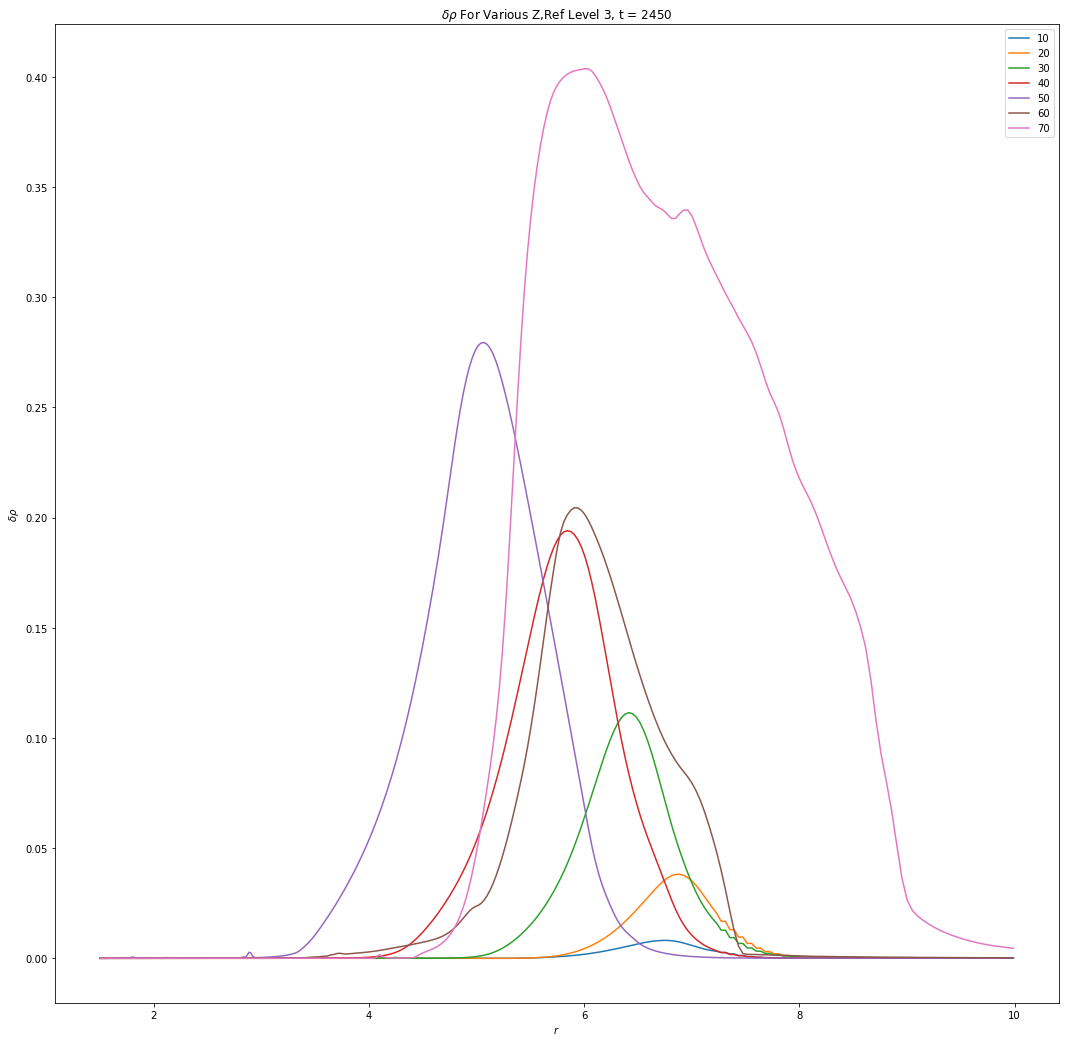

In [3]:
def z_cl(z):
    if z >= zc[-1]:
        return len(zc)-1
    return int(len(zc)*z/zc[-1])

frame=2450
dir='output_files_pr_cor_o/refined_3'
#xf,yf,zf,A=vtk('/Users/Omer/Documents/Academic_Projects/ATHENA_code/athane++_pub_new/athena/runs/kink.block0.out2.00000.vtk')
#xf,yf,zf,A=vtk('/Users/Omer/Documents/Academic_Projects/ATHENA_code/athane++_pub_new/athena/runs1/kink.block0.out2.%1.5d.vtk'%frame)
#A=athdf('/gamma_home/omerbr/ATHENA/athena_oz/runs/test_BC/jet.out2.%1.5d.athdf'%frame)
A=athdf('/gamma_home/ozamiel/athena2/runs_magfld/B_method/'+dir+'/jet.out2.%1.5d.athdf'%frame, x1_max = 10)# ,return_levels = 1)
print(A.keys())

#xc=(A['x1f'][1:]+A['x1f'][:-1])/2;
#yc=(A['x2f'][1:]+A['x2f'][:-1])/2;
#zc=(A['x3f'][1:]+A['x3f'][:-1])/2;
gam_add=4./3
rc=A['x1v']
thc=A['x2v']
zc=A['x3v']

rr, tt = np.meshgrid(rc,thc)
xx=rr*np.cos(tt)
yy=rr*np.sin(tt)

#phi=np.arctan2(yy,xx)
#Bphi=-A["Bcc1"]*np.sin(phi)+A["Bcc2"]*np.cos(phi)
Br=A["Bcc1"]
Bphi=A["Bcc2"]
Bz=A["Bcc3"]
p=A["press"]
rho=A["rho"]
ur=A["vel1"]
uphi=A["vel2"]
uz=A["vel3"]
usq=A["vel1"]**2+A["vel2"]**2+A["vel3"]**2
vabs=np.sqrt(usq/(usq+1))
gamsq=np.sqrt(usq+1)
udotB=A["vel1"]*A["Bcc1"]+A["vel2"]*A["Bcc2"]+A["vel3"]*A["Bcc3"]
Bsq=A["Bcc1"]**2+A["Bcc2"]**2+A["Bcc3"]**2
bsq=1./gamsq*(udotB**2+Bsq)  #proper frame B
bsq[np.where(bsq==0)]=1e-15
w=rho+gam_add/(gam_add-1)*p
atwd = (usq+1)*(rho+gam_add*p)
h = 1+(gam_add/(gam_add-1))*(p/rho)
sig_1 = bsq/rho
sig_2 = bsq/w
#levels = A['Levels']

def delt_rho(z):
    z_const = z_cl(z)
    rho_avrg = np.sum(rho[z_const,:,:],axis = 0)*(thc[1]-thc[0])/(2*np.pi)
    delt_rho = np.zeros(len(rc))
    for r in range(len(rc)):
        delt_rho[r] = np.sqrt((np.sum((rho[z_const,:,r] - rho_avrg[r])**2))/len(thc))
    return delt_rho



# grid sizes and cell shape
Nx,Ny,Nz=np.shape(A["rho"])
dr=A['x1f'][1:]-A['x1f'][:-1]
dth=A['x2f'][1:]-A['x2f'][:-1]
dz=A['x3f'][1:]-A['x3f'][:-1]
display("Time:%1.1f"%(A['Time']))
display("Box size: (r_min,r_max,z_min,z_max) = %1.1f,%1.1f,%1.1f,%1.1f"%(A['x1f'][0],A['x1f'][-1],A['x3f'][0],A['x3f'][-1]))
display("(Nx,Ny,Nz) = %d,%d,%d"%(Nx,Ny,Nz))
display("(dr[0],r[0]*dth,dz) = %f,%f,%f"%(dr[0],rc[0]*dth[0],dz[0]))
display("(dz/dr[0],dz/r[0]dth,dr[0]/r[0]dth) = %f,%f,%f"%(dz[0]/dr[0],dz[0]/(rc[0]*dth[0]),dr[0]/(rc[0]*dth[0])))
#display(dr/dz[0])
#display(dr/(rc*dth[0]))
#display(rc*dth[0]/dz)


figsize=(18,18)

parList = ("delt_rho(10)","delt_rho(20)","delt_rho(30)","delt_rho(40)","delt_rho(50)","delt_rho(60)","delt_rho(70)") 
Np=len(parList)

fig = plt.figure(figsize=figsize)
for i in range(0,Np,1):
    par=eval(parList[i])
    plt.plot(rc,par)
    
    
plt.xlabel('$r$')
plt.ylabel('$\\delta\\rho$')
#plt.xlim([1.5,20])
plt.title("$\\delta\\rho$ For Various Z,Ref Level 3, t = %d"%frame)
plt.legend(['10','20','30','40','50','60','70'])
plt.draw()
plt.savefig('./output/delta_rho')
#plt.show()

dict_keys(['Coordinates', 'DatasetNames', 'MaxLevel', 'MeshBlockSize', 'NumCycles', 'NumMeshBlocks', 'NumVariables', 'RootGridSize', 'RootGridX1', 'RootGridX2', 'RootGridX3', 'Time', 'VariableNames', 'x1f', 'x1v', 'x2f', 'x2v', 'x3f', 'x3v', 'rho', 'press', 'vel1', 'vel2', 'vel3', 'Bcc1', 'Bcc2', 'Bcc3'])


'Time:2450.0'

'Box size: (r_min,r_max,z_min,z_max) = 1.5,10.0,0.0,200.0'

'(Nx,Ny,Nz) = 1536,256,347'

'(dr[0],r[0]*dth,dz) = 0.008242,0.036917,0.130208'

'(dz/dr[0],dz/r[0]dth,dr[0]/r[0]dth) = 15.797458,3.527077,0.223269'

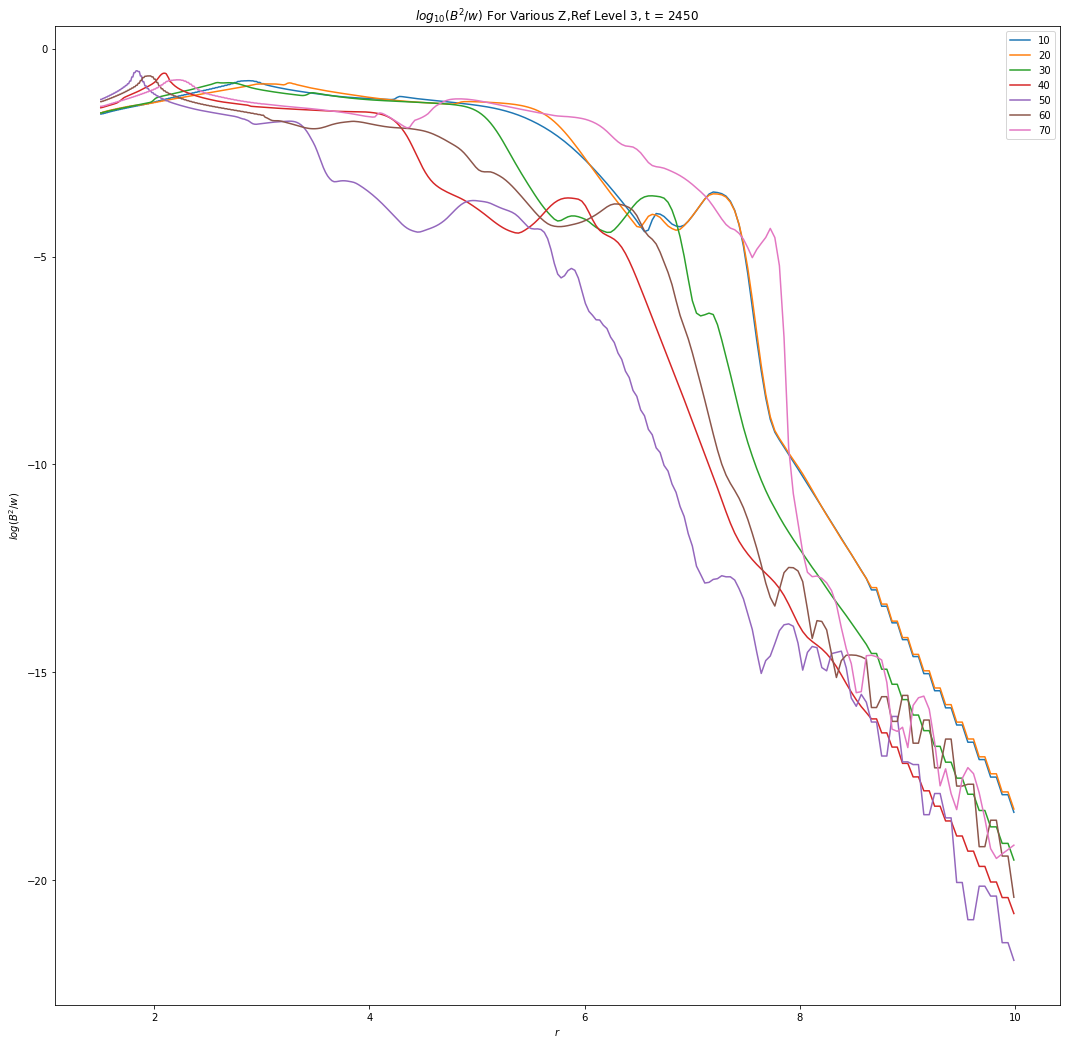

In [5]:
def z_cl(z):
    if z >= zc[-1]:
        return len(zc)-1
    return int(len(zc)*z/zc[-1])

frame=2450
dir='output_files_pr_cor_n/refined_3'
#xf,yf,zf,A=vtk('/Users/Omer/Documents/Academic_Projects/ATHENA_code/athane++_pub_new/athena/runs/kink.block0.out2.00000.vtk')
#xf,yf,zf,A=vtk('/Users/Omer/Documents/Academic_Projects/ATHENA_code/athane++_pub_new/athena/runs1/kink.block0.out2.%1.5d.vtk'%frame)
#A=athdf('/gamma_home/omerbr/ATHENA/athena_oz/runs/test_BC/jet.out2.%1.5d.athdf'%frame)
A=athdf('/gamma_home/ozamiel/athena2/runs_magfld/B_method/'+dir+'/jet.out2.%1.5d.athdf'%frame, x1_max = 10)# ,return_levels = 1)
print(A.keys())

#xc=(A['x1f'][1:]+A['x1f'][:-1])/2;
#yc=(A['x2f'][1:]+A['x2f'][:-1])/2;
#zc=(A['x3f'][1:]+A['x3f'][:-1])/2;
gam_add=4./3
rc=A['x1v']
thc=A['x2v']
zc=A['x3v']

rr, tt = np.meshgrid(rc,thc)
xx=rr*np.cos(tt)
yy=rr*np.sin(tt)

#phi=np.arctan2(yy,xx)
#Bphi=-A["Bcc1"]*np.sin(phi)+A["Bcc2"]*np.cos(phi)
Br=A["Bcc1"]
Bphi=A["Bcc2"]
Bz=A["Bcc3"]
p=A["press"]
rho=A["rho"]
ur=A["vel1"]
uphi=A["vel2"]
uz=A["vel3"]
usq=A["vel1"]**2+A["vel2"]**2+A["vel3"]**2
vabs=np.sqrt(usq/(usq+1))
gamsq=np.sqrt(usq+1)
udotB=A["vel1"]*A["Bcc1"]+A["vel2"]*A["Bcc2"]+A["vel3"]*A["Bcc3"]
Bsq=A["Bcc1"]**2+A["Bcc2"]**2+A["Bcc3"]**2
bsq=1./gamsq*(udotB**2+Bsq)  #proper frame B
bsq[np.where(bsq==0)]=1e-15
w=rho+gam_add/(gam_add-1)*p
atwd = (usq+1)*(rho+gam_add*p)
h = 1+(gam_add/(gam_add-1))*(p/rho)
sig_1 = bsq/rho
sig_2 = bsq/w
#levels = A['Levels']

def delt_rho(z):
    z_const = z_cl(z)
    rho_avrg = np.sum(rho[z_const,:,:],axis = 0)*(thc[1]-thc[0])/(2*np.pi)
    #delt_rho = np.sqrt((np.sum(rho[z_const,:,:] - rho_avrg)**2, axis = 0)/len(thc))
    delt_rho = np.zeros(len(rc))
    for r in range(len(rc)):
        delt_rho[r] = np.sqrt((np.sum((rho[z_const,:,r] - rho_avrg[r])**2))/len(thc))
    return delt_rho



# grid sizes and cell shape
Nx,Ny,Nz=np.shape(A["rho"])
dr=A['x1f'][1:]-A['x1f'][:-1]
dth=A['x2f'][1:]-A['x2f'][:-1]
dz=A['x3f'][1:]-A['x3f'][:-1]
display("Time:%1.1f"%(A['Time']))
display("Box size: (r_min,r_max,z_min,z_max) = %1.1f,%1.1f,%1.1f,%1.1f"%(A['x1f'][0],A['x1f'][-1],A['x3f'][0],A['x3f'][-1]))
display("(Nx,Ny,Nz) = %d,%d,%d"%(Nx,Ny,Nz))
display("(dr[0],r[0]*dth,dz) = %f,%f,%f"%(dr[0],rc[0]*dth[0],dz[0]))
display("(dz/dr[0],dz/r[0]dth,dr[0]/r[0]dth) = %f,%f,%f"%(dz[0]/dr[0],dz[0]/(rc[0]*dth[0]),dr[0]/(rc[0]*dth[0])))
#display(dr/dz[0])
#display(dr/(rc*dth[0]))
#display(rc*dth[0]/dz)


figsize=(18,18)

parList = ("np.log10(sig_2)[z_cl(10),0,:]","np.log10(sig_2)[z_cl(20),0,:]","np.log10(sig_2)[z_cl(30),0,:]","np.log10(sig_2)[z_cl(40),0,:]","np.log10(sig_2)[z_cl(50),0,:]","np.log10(sig_2)[z_cl(60),0,:]","np.log10(sig_2)[z_cl(70),0,:]") 
Np=len(parList)

fig = plt.figure(figsize=figsize)
for i in range(0,Np,1):
    par=eval(parList[i])
    plt.plot(rc,par)
    
    
plt.xlabel('$r$')
plt.ylabel('$log(B^2/w)$')
#plt.xlim([1.5,20])
plt.title("$log_{10}(B^2/w)$ For Various Z,Ref Level 3, t = %d"%frame)
plt.legend(['10','20','30','40','50','60','70'])
plt.draw()
plt.savefig('./output/bsqw_zs')
#plt.show()